In [11]:
#.libPaths(c('/usr/share/R/library','/usr/lib64/R/library',''))
suppressMessages(library(SingleCellExperiment))
suppressMessages(library(scater))
options(stringsAsFactors = FALSE)
setwd("~/projects/training")

## 7.19 重做
/Share/home/caojingyi/exRNA/process/18.new_hcc_lulab/05.matrix/merged_table

#### load data & annotations

In [12]:
wholeanno <-read.table('wholeannotation.csv',sep=',',header=T)[seq(1,64),]
wholeanno$Class <- "Ctrl"
wholeanno[which(wholeanno$Disease_status=="HCC_before_surgery"),"Class"] <- "HCC"

In [13]:
wholeanno$Sample_ID

[1] "lulab_249136_B"   "lulab_385247_B"   "lulab_423976_B"   "lulab_497411_B"  
 [5] "lulab_497497_B"   "lulab_498127_B"   "lulab_498187_B"   "lulab_498221_B"  
 [9] "lulab_507450_B"   "lulab_507468_B"   "lulab_507511_B"   "lulab_507599_B"  
[13] "lulab_507867_B"   "lulab_507887_B"   "lulab_507891_B"   "lulab_507909_B"  
[17] "lulab_508877_B"   "lulab_508897_B"   "lulab_511030_B"   "lulab_511485_B"  
[21] "lulab_515058_B"   "lulab_515292_B"   "lulab_SH325716_B" "lulab_SH327409_B"
[25] "lulab_SH327412_B" "lulab_SH327428_B" "lulab_17402567_B" "lulab_3497470_B" 
[29] "lulab_5474594_B"  "lulab_6474170_B"  "lulab_8397116_B"  "lulab_BD.LOW.mix"
[33] "lulab_LY"         "lulab_CXD"        "lulab_Normal_1"   "lulab_Normal_2"  
[37] "lulab_Normal_3"   "lulab_Normal_4"   "lulab_Normal_5"   "lulab_Normal_6"  
[41] "lulab_Normal_7"   "lulab_Normal_8"   "lulab_498187_A"   "lulab_498221_A"  
[45] "lulab_385247_A"   "lulab_498191_A"   "lulab_511122_A"   "lulab_510199_A"  
[49] "lulab_333874_A"   "lulab_482592_A"   "lulab_486978_A"   "lulab_508955_A"  
[53] "lulab_509155_A"   "lulab_509442_A"   "lulab_509970_A"   "lulab_510470_A"  
[57] "lulab_515058_A"   "lulab_515292_A"   "lulab_10515058_A" "lulab_12402567_A"
[61] "lulab_13515292_A" "lulab_HBV_1"      "lulab_HBV_2"      "lulab_HBV_3"

In [14]:
raw_mx <- read.table('/Share/home/caojingyi/exRNA/process/18.new_hcc_lulab/05.matrix/merged_table/hcc_lulab.sequentialMap.featureCounts.merged.binned.nomRNA.mx', sep = "\t")
                      #/Share/home/caojingyi/exRNA/process/18.new_hcc_lulab/05.matrix/table/hcc_lulab.sequentialMap.featureCounts.merged.binned.name.mx
colnames(raw_mx)<-wholeanno$Sample_ID
#anno <- read.table("hcc_lulab.sample.info.txt", sep = "\t", header=T)
#anno$Class <- "Ctrl"
#anno[which(anno$Disease_status=="HCC_before_surgery"),"Class"] <- "HCC"
#mx <- raw_mx[, (names(raw_mx) %in% anno$Sample_ID)]

In [10]:
rowsums <-rowSums(raw_mx)
rowsumind <-order(-rowsums)
top20name <-rownames(raw_mx)[rowsumind[1:20]]

In [119]:
dim(raw_mx)

[1] 2740157      64

In [128]:
dim(raw_mx[,wholeanno$Disease_status=="HCC"])

[1] 2740157      31

In [130]:
rowsums_hcc <-rowSums(raw_mx[,wholeanno$Disease_status=="HCC"])
rowsumind_hcc <-order(-rowsums_hcc)
top20name_hcc <-rownames(raw_mx[,wholeanno$Disease_status=="HCC"])[rowsumind_hcc[1:20]]

In [132]:
intersect(top20name_hcc,top20name)

[1] "Y_RNA_ENSG00000201778.1__157153548__157153578"
 [2] "Y_RNA_ENSG00000201778.1__157153563__157153593"
 [3] "Y_RNA_ENSG00000201778.1__157153578__157153608"
 [4] "miRNA_ENSG00000284565.1__28861384__28861414"  
 [5] "miRNA_ENSG00000284565.1__28861399__28861429"  
 [6] "miRNA_ENSG00000284440.1__58451089__58451119"  
 [7] "miRNA_ENSG00000284440.1__58451074__58451104"  
 [8] "miRNA_ENSG00000284440.1__58451104__58451134"  
 [9] "miRNA_ENSG00000199085.3__25949934__25949964"  
[10] "miRNA_ENSG00000199085.3__25949919__25949949"  
[11] "miRNA_ENSG00000284190.1__59841281__59841311"  
[12] "miRNA_ENSG00000284190.1__59841266__59841296"  
[13] "miRNA_ENSG00000199179.3__62603701__62603731"  
[14] "miRNA_ENSG00000199179.3__62603686__62603716"  
[15] "miRNA_ENSG00000283450.1__41660459__41660489"  
[16] "miRNA_ENSG00000283450.1__41660444__41660474"  
[17] "miRNA_ENSG00000199075.1__37969404__37969434"

In [131]:
top20name_hcc

[1] "Y_RNA_ENSG00000201778.1__157153548__157153578"
 [2] "Y_RNA_ENSG00000201778.1__157153563__157153593"
 [3] "Y_RNA_ENSG00000201778.1__157153578__157153608"
 [4] "miRNA_ENSG00000284565.1__28861384__28861414"  
 [5] "miRNA_ENSG00000284565.1__28861399__28861429"  
 [6] "miRNA_ENSG00000284440.1__58451089__58451119"  
 [7] "miRNA_ENSG00000284440.1__58451074__58451104"  
 [8] "miRNA_ENSG00000284440.1__58451104__58451134"  
 [9] "miRNA_ENSG00000199085.3__25949934__25949964"  
[10] "miRNA_ENSG00000199085.3__25949919__25949949"  
[11] "miRNA_ENSG00000284190.1__59841281__59841311"  
[12] "miRNA_ENSG00000284190.1__59841266__59841296"  
[13] "miRNA_ENSG00000199179.3__62603701__62603731"  
[14] "miRNA_ENSG00000199179.3__62603686__62603716"  
[15] "miRNA_ENSG00000283450.1__41660459__41660489"  
[16] "miRNA_ENSG00000274705.2__41660456__41660486"  
[17] "miRNA_ENSG00000274705.2__41660471__41660501"  
[18] "miRNA_ENSG00000274705.2__41660501__41660508"  
[19] "miRNA_ENSG00000283450.1__41660444__41660474"  
[20] "miRNA_ENSG00000199075.1__37969404__37969434"

In [15]:
top20name 

[1] "Y_RNA_ENSG00000201778.1__157153548__157153578"
 [2] "Y_RNA_ENSG00000201778.1__157153563__157153593"
 [3] "Y_RNA_ENSG00000201778.1__157153578__157153608"
 [4] "miRNA_ENSG00000284565.1__28861384__28861414"  
 [5] "miRNA_ENSG00000284565.1__28861399__28861429"  
 [6] "miRNA_ENSG00000284440.1__58451089__58451119"  
 [7] "miRNA_ENSG00000284440.1__58451074__58451104"  
 [8] "miRNA_ENSG00000284440.1__58451104__58451134"  
 [9] "miRNA_ENSG00000284190.1__59841281__59841311"  
[10] "miRNA_ENSG00000284190.1__59841266__59841296"  
[11] "miRNA_ENSG00000199179.3__62603701__62603731"  
[12] "miRNA_ENSG00000199179.3__62603686__62603716"  
[13] "miRNA_ENSG00000199085.3__25949934__25949964"  
[14] "miRNA_ENSG00000199085.3__25949919__25949949"  
[15] "miRNA_ENSG00000199075.1__37969419__37969449"  
[16] "miRNA_ENSG00000199075.1__37969404__37969434"  
[17] "miRNA_ENSG00000207789.1__57824639__57824669"  
[18] "miRNA_ENSG00000207789.1__57824654__57824684"  
[19] "miRNA_ENSG00000283450.1__41660459__41660489"  
[20] "miRNA_ENSG00000283450.1__41660444__41660474"

In [ ]:
fake_mx <- read.table('05.matrix/fakeall.csv', sep = ",",header = TRUE)

In [ ]:
fake_mx

先去除top20

In [16]:
fulltop20 <- c('Y_RNA_ENSG00000201778.1__157153548__157153578' ,'Y_RNA_ENSG00000201778.1__157153563__157153593',
               'Y_RNA_ENSG00000201778.1__157153578__157153608', 'miRNA_ENSG00000284565.1__28861384__28861414',
               'miRNA_ENSG00000284565.1__28861399__28861429' ,'miRNA_ENSG00000284440.1__58451089__58451119' ,
               'miRNA_ENSG00000284440.1__58451074__58451104' ,'miRNA_ENSG00000284440.1__58451104__58451134' ,
               'miRNA_ENSG00000284190.1__59841281__59841311' ,'miRNA_ENSG00000284190.1__59841266__59841296' ,
               'miRNA_ENSG00000199179.3__62603701__62603731' ,'miRNA_ENSG00000199179.3__62603686__62603716' ,
               'miRNA_ENSG00000199085.3__25949934__25949964', 'miRNA_ENSG00000199085.3__25949919__25949949' ,
               'miRNA_ENSG00000199075.1__37969419__37969449', 'miRNA_ENSG00000199075.1__37969404__37969434' ,
               'miRNA_ENSG00000207789.1__57824639__57824669', 'miRNA_ENSG00000207789.1__57824654__57824684' ,
               'miRNA_ENSG00000283450.1__41660459__41660489', 'miRNA_ENSG00000283450.1__41660444__41660474')


In [56]:
fulltop20

[1] "Y_RNA_ENSG00000201778.1__157153548__157153578"
 [2] "Y_RNA_ENSG00000201778.1__157153563__157153593"
 [3] "Y_RNA_ENSG00000201778.1__157153578__157153608"
 [4] "miRNA_ENSG00000284565.1__28861384__28861414"  
 [5] "miRNA_ENSG00000284565.1__28861399__28861429"  
 [6] "miRNA_ENSG00000284440.1__58451089__58451119"  
 [7] "miRNA_ENSG00000284440.1__58451074__58451104"  
 [8] "miRNA_ENSG00000284440.1__58451104__58451134"  
 [9] "miRNA_ENSG00000284190.1__59841281__59841311"  
[10] "miRNA_ENSG00000284190.1__59841266__59841296"  
[11] "miRNA_ENSG00000199179.3__62603701__62603731"  
[12] "miRNA_ENSG00000199179.3__62603686__62603716"  
[13] "miRNA_ENSG00000199085.3__25949934__25949964"  
[14] "miRNA_ENSG00000199085.3__25949919__25949949"  
[15] "miRNA_ENSG00000199075.1__37969419__37969449"  
[16] "miRNA_ENSG00000199075.1__37969404__37969434"  
[17] "miRNA_ENSG00000207789.1__57824639__57824669"  
[18] "miRNA_ENSG00000207789.1__57824654__57824684"  
[19] "miRNA_ENSG00000283450.1__41660459__41660489"  
[20] "miRNA_ENSG00000283450.1__41660444__41660474"

In [57]:
write.csv(fulltop20,'binnedtop20.csv')

In [71]:
write.csv(order(-rowSums(raw_mx)),'05.matrix/binnedtopindfromraw.csv')
rownames(raw_mx)[top20ind]

In [73]:
top20ind = c(841330, 841331, 841332,   3494,   3496,   4024,   4022,   4026,
         3716,   3715,   1725,   1724,   7368,   7367,   5924,   5923,
         1715,   1716,   7874,   7872)

In [46]:
write.csv(raw_mx[which(rownames(raw_mx) %in% fulltop20), ],'05.matrix/binnedtop20.csv')
raw_mx[which(rownames(raw_mx) %in% fulltop20), ]

In [35]:
new_raw_mx <-raw_mx[-which(rownames(raw_mx) %in% fulltop20), ]

In [ ]:
print (dim(raw_mx))
print (dim(new_raw_mx))

In [ ]:
colnames(new_raw_mx)

In [17]:
wholeanno$Status <- "HD"
wholeanno[which(wholeanno$Stage.BCLC=="A"),"Status"] <- "A"
wholeanno[which(wholeanno$Stage.BCLC=="B"),"Status"] <- "B"
wholeanno[which(wholeanno$Stage.BCLC=="C"),"Status"] <- "C"
wholeanno[which(wholeanno$Disease_status=="HCC_after_surgery"),"Status"] <- "Postoperative"
wholeanno[which(wholeanno$Disease_status=="mixed by 5 HBV"),"Status"] <- "CHB"

In [80]:
wholeanno[which(wholeanno$Disease_status=="HCC_before_surgery"),"Disease_status"] <- "HCC"
wholeanno[which(wholeanno$Disease_status=="Healthy"),"Disease_status"] <- "HD"
wholeanno[which(wholeanno$Disease_status=="mixed by 5 HBV"),"Disease_status"] <- "CHB"

In [82]:
wholeanno$Status

[1] "A"             "A"             "C"             "A"            
 [5] "B"             "B"             "B"             "A"            
 [9] "A"             "B"             "A"             "B"            
[13] "A"             "A"             "A"             "B"            
[17] "A"             "A"             "C"             "B"            
[21] "A"             "B"             "C"             "A"            
[25] "B"             "A"             "A"             "B"            
[29] "C"             "A"             "A"             "HD"           
[33] "HD"            "HD"            "HD"            "HD"           
[37] "HD"            "HD"            "HD"            "HD"           
[41] "HD"            "HD"            "Postoperative" "Postoperative"
[45] "Postoperative" "Postoperative" "Postoperative" "Postoperative"
[49] "Postoperative" "Postoperative" "Postoperative" "Postoperative"
[53] "Postoperative" "Postoperative" "Postoperative" "Postoperative"
[57] "Postoperative" "Postoperative" "Postoperative" "Postoperative"
[61] "Postoperative" "CHB"           "CHB"           "CHB"

In [92]:
reads.qc$Disease_status

[1] "HCC" "HCC" "HCC" "HCC" "HCC" "HCC" "HCC" "HCC" "HCC" "HCC" "HCC" "HCC"
[13] "HCC" "HCC" "HCC" "HCC" "HCC" "HCC" "HCC" "HCC" "HCC" "HCC" "HCC" "HCC"
[25] "HCC" "HCC" "HCC" "HCC" "HCC" "HCC" "HD"  "HD"  "HD"  "HD"  "HD"  "HD" 
[37] "HD"  "HD"  "HD"  "HD"  "CHB" "CHB" "CHB"

In [60]:
wholeanno$use

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1
[39] 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1

#### drop some sample

#### 调整removeind  
<span class="burk">改，后续用use来选sample！</span>

In [8]:
seq(1,64)[wholeanno$sampleuse ==1]

[1]  1  2  3  4  5  6  7  8  9 10 11 12 13 14 16 17 18 19 20 21 22 23 24 25 26
[26] 27 28 29 30 31 33 34 35 36 37 38 39 40 41 42 43 44 45 46 48 49 50 51 52 53
[51] 54 55 56 57 58 59 60 61 62 63 64

In [61]:
wholeanno$Sample_ID[wholeanno$use ==1]

[1] "lulab_249136_B"   "lulab_385247_B"   "lulab_423976_B"   "lulab_497411_B"  
 [5] "lulab_497497_B"   "lulab_498127_B"   "lulab_498187_B"   "lulab_498221_B"  
 [9] "lulab_507450_B"   "lulab_507468_B"   "lulab_507511_B"   "lulab_507599_B"  
[13] "lulab_507867_B"   "lulab_507887_B"   "lulab_507909_B"   "lulab_508877_B"  
[17] "lulab_508897_B"   "lulab_511030_B"   "lulab_511485_B"   "lulab_515058_B"  
[21] "lulab_515292_B"   "lulab_SH325716_B" "lulab_SH327409_B" "lulab_SH327412_B"
[25] "lulab_SH327428_B" "lulab_17402567_B" "lulab_3497470_B"  "lulab_5474594_B" 
[29] "lulab_6474170_B"  "lulab_8397116_B"  "lulab_LY"         "lulab_CXD"       
[33] "lulab_Normal_1"   "lulab_Normal_2"   "lulab_Normal_3"   "lulab_Normal_4"  
[37] "lulab_Normal_5"   "lulab_Normal_6"   "lulab_Normal_7"   "lulab_Normal_8"  
[41] "lulab_HBV_1"      "lulab_HBV_2"      "lulab_HBV_3"

In [83]:
mx <- raw_mx[-which(rownames(raw_mx) %in% fulltop20),seq(1,64)[wholeanno$use ==1]]  #64个sample还剩下remainind个

In [63]:
mx_ <- raw_mx[,seq(1,64)[wholeanno$use ==1]]  #64个sample还剩下remainind个

<span class="mark">QC sample in another python jupyter, so freeze QC, drop some sample and start from imputation</span>

In [21]:
#print (dim(raw_mx))
print (dim(mx))
#print (dim(withoutaftermx))
# we use mx and withoutaftermx

[1] 2740137      61


****************
#### construct singleCellExperiment object

#### 选择mx或withoutaftermx作为接下来的矩阵

In [22]:
dim(mx)

[1] 2740137      61

In [ ]:
keep_feature <- rowSums(counts(reads) > 0) > 0
reads <- reads[keep_feature, ]
dim(reads)

In [84]:
keep_feature <- rowSums(mx > 0) > 0
mx <- mx[keep_feature, ]
dim(mx)

[1] 1012124      43

In [85]:
reads <- SingleCellExperiment( 
    assays = list(counts = as.matrix(mx)),
    colData = wholeanno[wholeanno$use ==1,])

In [ ]:
reads_ <- SingleCellExperiment(
    assays = list(counts = as.matrix(mx_)),
    colData = wholeanno[wholeanno$sampleuse ==1,])

In [25]:
keep_feature <- rowSums(counts(reads_) > 0) > 0
reads_ <- reads_[keep_feature, ]

##### Remove genes that are not expressed in any samples

In [87]:
reads <-  calculateQCMetrics(reads)
reads$use <-rep(TRUE,dim(reads)[2])

In [88]:
dim(reads)

[1] 1012124      43

In [ ]:
reads_ <-  calculateQCMetrics(reads_)

****************
### filter samples and genes

#### automitic filter

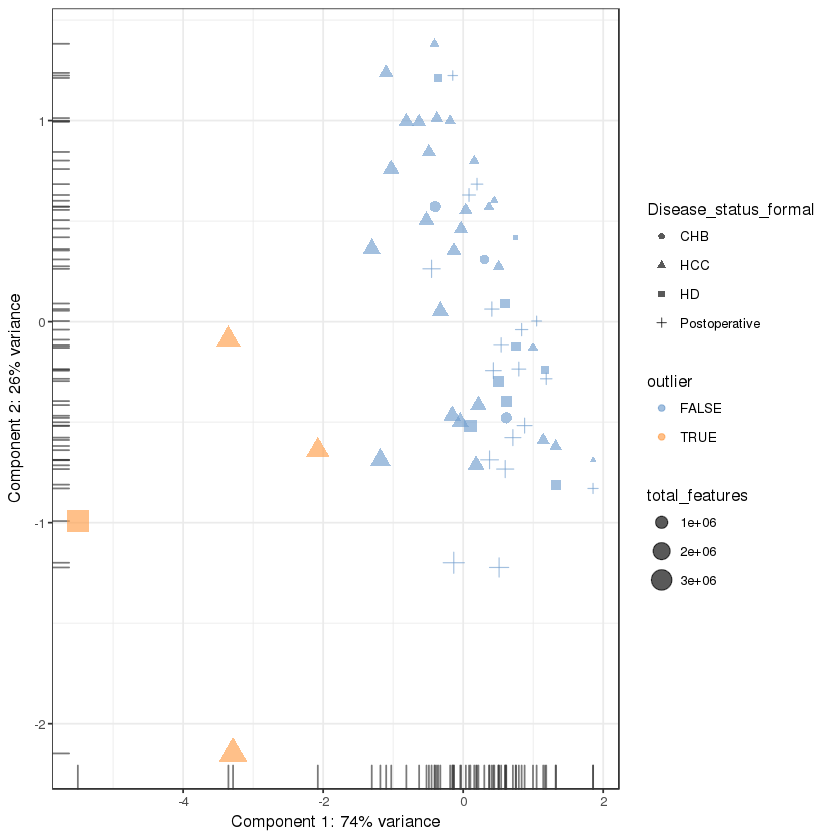

In [20]:
reads <- suppressMessages(plotPCA(
    reads,
    size_by = "total_features",
    shape_by = "Disease_status_formal",
    pca_data_input = "pdata",
    detect_outliers = TRUE,
    return_SCE = TRUE
))

filter_by_outlier <- !reads$outlier

In [60]:
reads_

class: SingleCellExperiment 
dim: 11866847 61 
metadata(0):
assays(1): counts
rownames(11866847): miRNA_ENSG00000278267.1__17369__17399
  miRNA_ENSG00000278267.1__17384__17414 ...
  mRNA_ENSG00000124334.17_PAR_Y__57197296__57197326
  mRNA_ENSG00000124334.17_PAR_Y__57197326__57197337
rowData names(0):
colnames(61): lulab_249136_B lulab_385247_B ... lulab_HBV_2 lulab_HBV_3
colData names(29): X Unnamed..0 ... Disease_status_formal Class
reducedDimNames(0):
spikeNames(0):

ERROR: Error in eval(expr, envir, enclos): object 'reads' not found


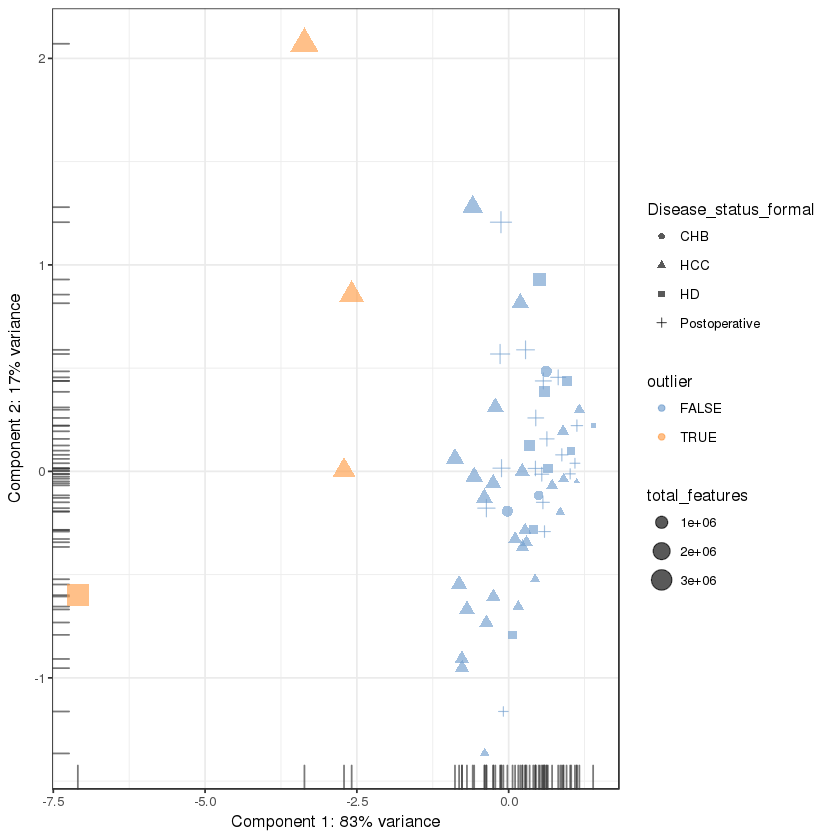

In [62]:
reads_ <- suppressMessages(plotPCA(
    reads_,
    size_by = "total_features",
    shape_by = "Disease_status_formal",
    pca_data_input = "pdata",
    detect_outliers = TRUE,
    return_SCE = TRUE
))

filter_by_outlier <- !reads$outlier

In [16]:
filter_by_outlier

ERROR: Error in eval(expr, envir, enclos): object 'filter_by_outlier' not found


#### sample filtering

In [ ]:
reads$use <-rep(TRUE,dim(reads)[2])

#### gene QC
##### filter genes with too low expression

plotHighestExprs(reads,n=20)

In [49]:
dim(reads.qc)

[1] 59492    61

In [88]:
write.csv(colSums(counts(reads_)),'05.matrix/readsbincolsum.csv')
write.csv(counts(reads_)[which(rownames(reads_) %in% fulltop20), ],'05.matrix/readstop20forbinned.csv')
dim(counts(reads_))

In [81]:
write.csv(counts(reads_)[which(rownames(reads_) %in% fulltop20), ],'05.matrix/readstop20forbinned.csv')

In [89]:
raw_mx[which(rownames(reads_) %in% fulltop20), ]

[1] 11866847       61

In [27]:
counts(reads_)<-counts(reads_)/10000

In [ ]:
plotHighestExprs(reads_,n=20)

plotQC(reads, type = "highest-expression")

In [69]:
dim(reads)

[1] 1012124      43

In [68]:
filter_genes <- apply(counts(reads[, colData(reads)$use]), 1, function(x) length(x[x >= 10]) >= 10)
table(filter_genes)
rowData(reads)$use <- filter_genes
reducedDim(reads) <- NULL
dim(reads[rowData(reads)$use, colData(reads)$use])

filter_genes
 FALSE   TRUE 
988754  23370 

[1] 23370    43

In [89]:
filter_genes <- apply(counts(reads[, colData(reads)$use]), 1, function(x) length(x[x >= 3]) >= 10)
table(filter_genes)
rowData(reads)$use <- filter_genes
reducedDim(reads) <- NULL
dim(reads[rowData(reads)$use, colData(reads)$use])

filter_genes
 FALSE   TRUE 
953283  58841 

[1] 58841    43

In [29]:
dim(reads[rowData(reads)$use, colData(reads)$use])

[1] 45726    61

In [30]:
dim(reads)

[1] 1082173      61

### 内存问题，这里暂存一下

In [28]:
tmpreadsfile = "05.matrix/hcc_lulab.sequentialMap.homer.merged.clean.binnednotrim61sampletmp.rds"
saveRDS(reads, file = tmpreadsfile)

In [6]:
tmpreadsfile = "05.matrix/hcc_lulab.sequentialMap.homer.merged.clean.binnednotrim61sampletmp.rds"

reads<-readRDS(tmpreadsfile)

In [110]:
assay(reads, "logcounts_raw") <- log2(counts(reads) + 1)
reads.qc <- reads[rowData(reads)$use, colData(reads)$use]
endog_genes <- !rowData(reads.qc)$is_feature_control

In [111]:
dim(reads.qc)

[1] 58841    43

In [37]:
sum(counts(reads.qc)<0)

[1] 0

In [112]:
# save the data
saveRDS(reads.qc, file = "05.matrix/hcc_lulab.sequentialMap.homer.merged.clean.binnednotrim61sample.rds")
write.csv(counts(reads.qc), "05.matrix/hcc_lulab.sequentialMap.homer.merged.clean.binnednotrim61sample.rds.csv")

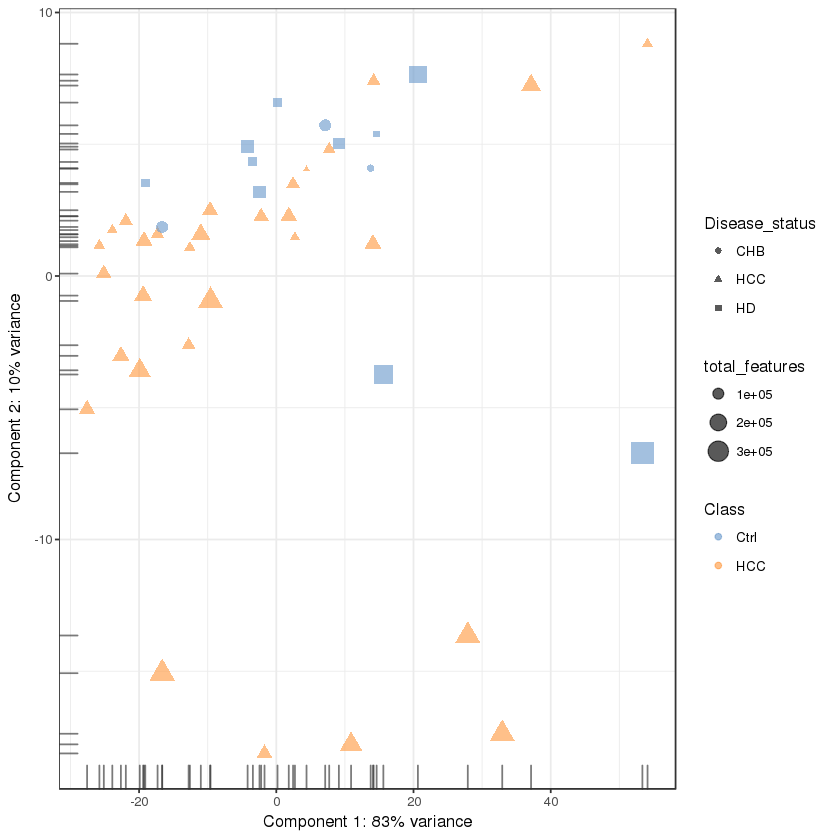

In [91]:
plotPCA(
    reads.qc[endog_genes, ],
    exprs_values = "logcounts_raw",
    colour_by = "Class",
    shape_by = "Disease_status",
    size_by = "total_features"
)

## imputation

In [47]:
assay(reads.qc, "logcounts_raw") <- log2(counts(reads.qc) + 1)
reads.qc <- reads.qc[rowData(reads.qc)$use, colData(reads.qc)$use]
endog_genes <- !rowData(reads.qc)$is_feature_control

In [48]:
dim(reads.qc)

[1] 59492    61

In [29]:
inputF1 <- t(assay(reads.qc, i="counts"))
write.csv(data.frame(sampleID = rownames(inputF1), lables = sampleLables, inputF1),'05.matrix/forfeatureselectionbynorm_61samplebinnedforanova.csv')


In [48]:
reads.qc<-readRDS("05.matrix/hcc_lulab.sequentialMap.homer.merged.clean.binnednotrim61sample.rds")

In [113]:
library("scImpute")
reads.qc <- readRDS("05.matrix/hcc_lulab.sequentialMap.homer.merged.clean.binnednotrim61sample.rds")
sampleLables <- c()
for(i in colnames(reads.qc)){tmp <- as.character(wholeanno[which(wholeanno$Sample_ID==i),"Class"]); sampleLables <- c(sampleLables,tmp)}

In [114]:
length(colnames(reads.qc))

[1] 43

In [108]:
length(sampleLables)

[1] 61

In [6]:
sum(counts(reads.qc)<0)

[1] 0

### cluster num?
两类或者五类？

In [115]:
scimpute(count_path = "05.matrix/hcc_lulab.sequentialMap.homer.merged.clean.binnednotrim61sample.rds.csv", infile = "csv", 
         outfile = "txt", out_dir = "05.matrix/imputation/binned/", Kcluster = 2, ncores = 2, labels = as.vector(sampleLables), labeled = TRUE)

[1] "reading in raw count matrix ..."
[1] "number of genes in raw count matrix 58841"
[1] "number of cells in raw count matrix 43"
[1] "estimating dropout probability for type 1 ..."
[1] "imputing dropout values for type 1 ..."
[1] "estimating dropout probability for type 2 ..."
[1] "imputing dropout values for type 2 ..."
[1] "writing imputed count matrix ..."


integer(0)

In [116]:
res.qc <- read.table("05.matrix/imputation/binned/scimpute_count.txt")
reads.qc.impute <- SingleCellExperiment(assays = list(counts = as.matrix(res.qc)), colData = colData(reads.qc))
reads.qc.impute <- calculateQCMetrics(reads.qc.impute)


In [117]:
assay(reads.qc.impute, "logcounts_raw") <- log2(counts(reads.qc.impute) + 1)

In [118]:
dim(reads.qc.impute)

[1] 58841    43

In [104]:
dim(res.qc)

[1] 45726    61

In [102]:
plotPCA(
    reads.qc.impute[endog_genes, ],
    exprs_values = "logcounts_raw",
    colour_by = "Class",
   shape_by = "Disease_status",
    size_by = "total_features"
)

ERROR: Error: subscript is a logical vector with out-of-bounds TRUE values


In [41]:
head(counts(reads.qc.impute))
saveRDS(counts(reads.qc.impute), file = "05.matrix/imputation/hcc_lulab.sequentialMap.homer.merged.clean.binnednotrim.rds")

,lulab_249136_B,lulab_385247_B,lulab_423976_B,lulab_497411_B,lulab_497497_B,lulab_498127_B,lulab_498187_B,lulab_498221_B,lulab_507450_B,lulab_507468_B,⋯,lulab_509970_A,lulab_510470_A,lulab_515058_A,lulab_515292_A,lulab_10515058_A,lulab_12402567_A,lulab_13515292_A,lulab_HBV_1,lulab_HBV_2,lulab_HBV_3
miRNA_ENSG00000278267.1__17384__17414,6,25,3,9,10,1,9,8,16,2,⋯,10,11,10,11,7,14,14,12,2,4
miRNA_ENSG00000278267.1__17399__17429,6,22,3,6,9,1,5,8,11,2,⋯,9,10,8,11,4,7,10,12,1,3
miRNA_ENSG00000278267.1__17429__17436,6,21,3,6,9,1,4,8,11,2,⋯,9,10,8,11,4,6,9,12,1,2
miRNA_ENSG00000273874.1__187906__187936,2,21,5,16,13,4,5,6,13,2,⋯,6,8,2,6,5,23,12,13,7,1
miRNA_ENSG00000273874.1__187921__187951,2,20,5,9,13,2,3,5,9,2,⋯,5,5,2,5,3,18,8,11,6,1
miRNA_ENSG00000273874.1__187951__187958,2,20,5,9,13,2,1,5,8,2,⋯,5,5,2,5,3,18,7,11,6,1


**********************
## normalization

In [24]:
reads.qc.impute
#counts logcounts_raw 是取log2的

class: SingleCellExperiment 
dim: 64237 61 
metadata(0):
assays(2): counts logcounts_raw
rownames(64237): miRNA_MIR6859-1__17384__17414
  miRNA_MIR6859-1__17399__17429 ...
  mRNA_ENSG00000198223.16_PAR_Y__1285853__1285883_10
  mRNA_ENSG00000198223.16_PAR_Y__1285853__1285883_11
rowData names(9): is_feature_control mean_counts ... log10_total_counts
  use
colnames(61): lulab_249136_B lulab_385247_B ... lulab_HBV_2 lulab_HBV_3
colData names(36): X Sample_ID ... pct_counts_top_500_features
  is_cell_control
reducedDimNames(0):
spikeNames(0):

In [25]:
sum(counts(reads.qc.impute)<0)

[1] 0

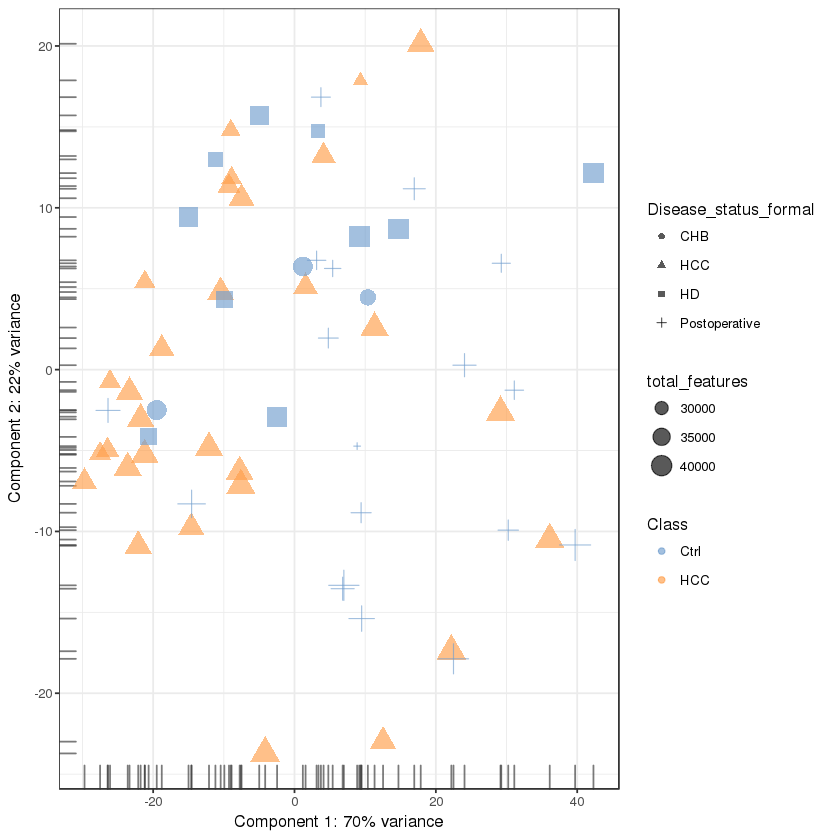

In [42]:
plotPCA(
    reads.qc.impute[endog_genes, ],
    exprs_values = "logcounts_raw",
    colour_by = "Class",
    shape_by = "Disease_status_formal",
    size_by = "total_features"
)

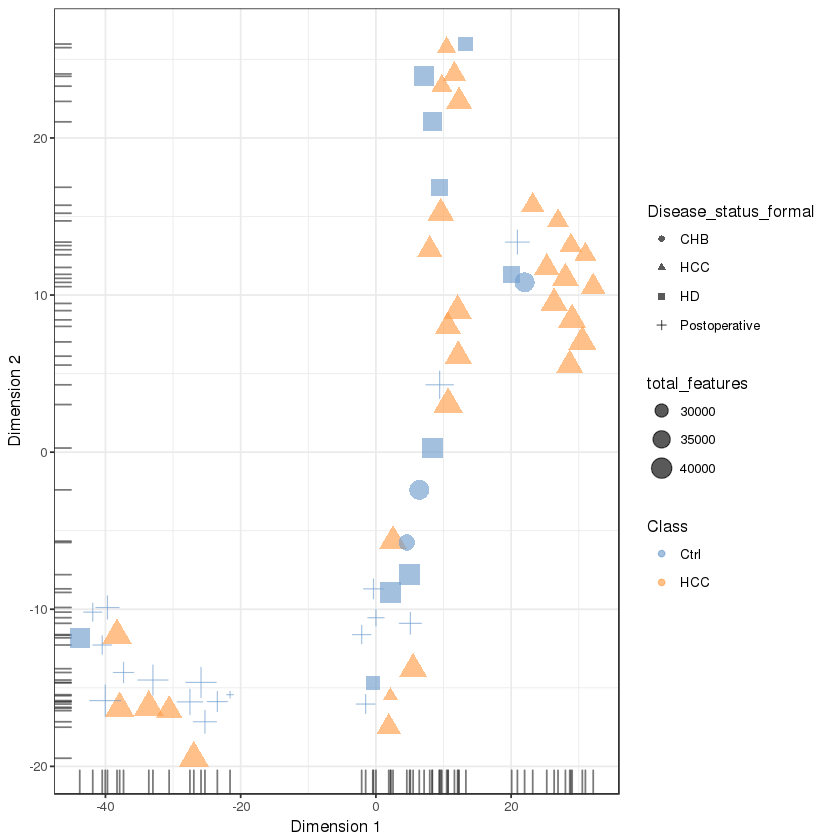

In [43]:
plotTSNE(
    reads.qc.impute[endog_genes, ],
    exprs_values = "logcounts_raw",
    perplexity = 8,
    colour_by = "Class",
    shape_by = "Disease_status_formal",
    size_by = "total_features",
    rand_seed = 123456,
    ntop = 300
)

In [44]:
# CPM
logcounts(reads.qc.impute) <- log2(calculateCPM(reads.qc.impute, use.size.factors = FALSE) + 1)

In [45]:
# scran (CPM)
library(scran)
# define cluster for each sample
sampleLables <- c()
for(i in colnames(reads.qc.impute)){tmp <- as.character(wholeanno[which(wholeanno$Sample_ID==i),"Class"]); sampleLables <- c(sampleLables,tmp)}

# sampleLables <- quickCluster(reads.qc.impute, min.size = 10)
sampleLables <- replace(sampleLables, which(sampleLables=="HCC"),1)
sampleLables <- replace(sampleLables, which(sampleLables=="Ctrl"),2)
sampleLables <- as.numeric(sampleLables)
reads.qc.impute <- computeSumFactors(reads.qc.impute, sizes = 5, clusters = sampleLables)
reads.qc.impute <- normalize(reads.qc.impute)

Loading required package: BiocParallel
Warning message in .computeSumFactors(assay(x, i = assay.type), subset.row = subset.row, :
“encountered negative size factor estimates”

In [46]:
dim(reads.qc.impute)

[1] 45726    61

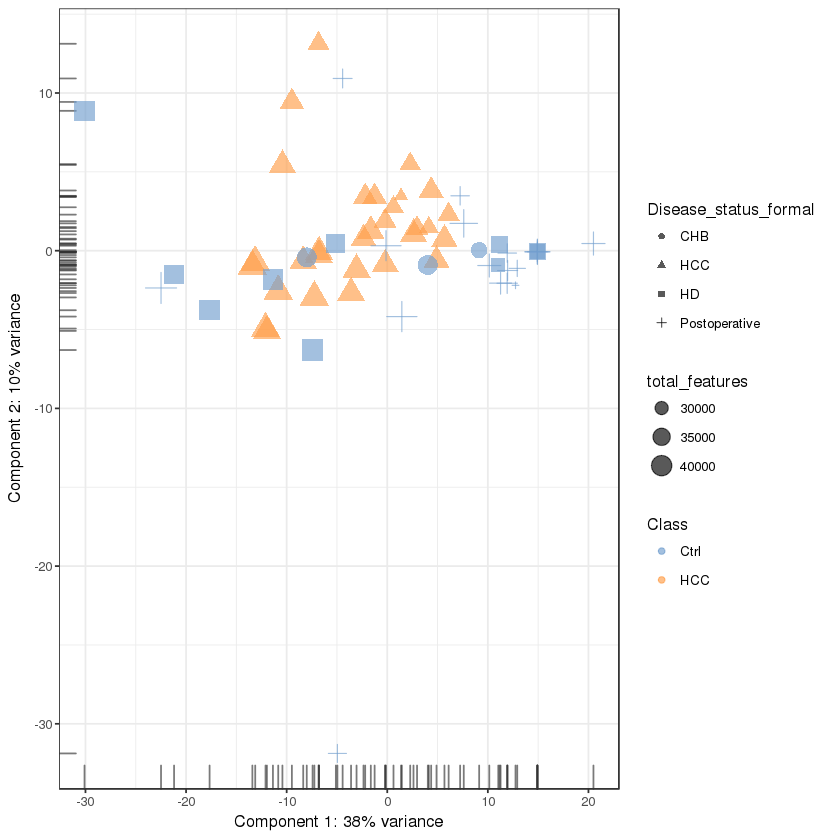

In [49]:
plotPCA(
    reads.qc.impute,
    exprs_values = "logcounts",
    colour_by = "Class",
    shape_by = "Disease_status_formal",
    size_by = "total_features",
    ntop = 300
)

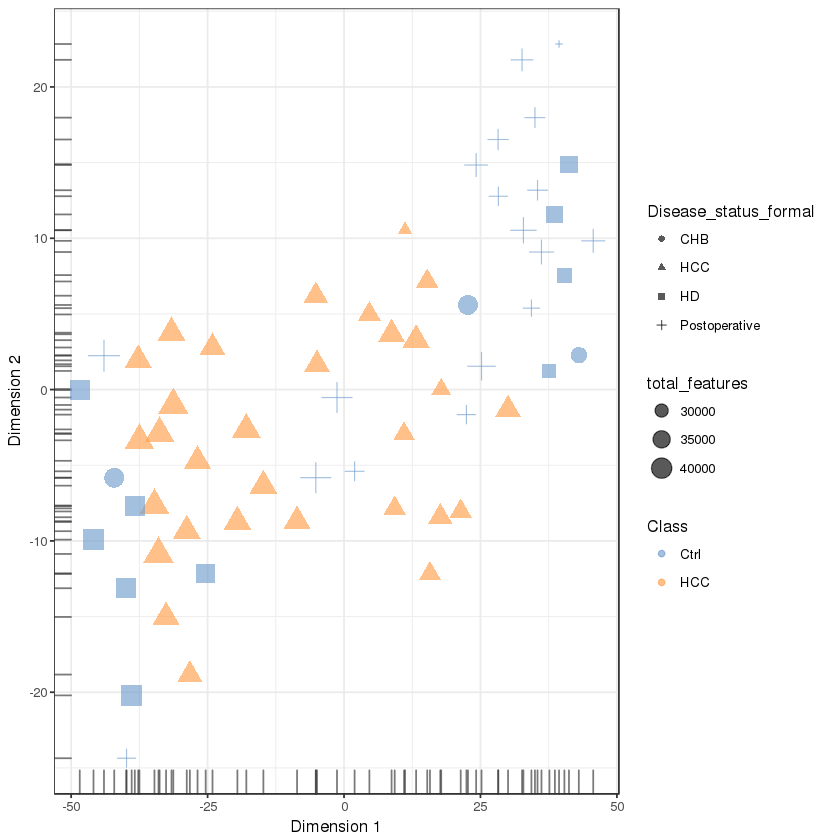

In [53]:
plotTSNE(
    reads.qc.impute,
    exprs_values = "logcounts",
    perplexity = 8,
    colour_by = "Class",
    shape_by = "Disease_status_formal",
    size_by = "total_features",
    check_duplicates = FALSE,
    rand_seed = 123456,
    ntop = 300
)

plotRLE(
    reads.qc.impute,
    exprs_mats = list(Raw = "counts", scran = "logcounts"),
    exprs_logged = c(TRUE, TRUE),
    colour_by = "Disease_status",
    legend = "auto"
)

### save data after normalization

In [54]:
dim(logcounts(reads.qc.impute))

[1] 45726    61

In [55]:
write.csv(raw_mx[which(rownames(raw_mx) %in% fulltop20), ],'05.matrix/forfeatureselectionbynorm_61samplebinnedtop20.csv')
inputF1 <- t(assay(reads.qc.impute, i="logcounts"))
write.csv(data.frame(sampleID = rownames(inputF1), lables = sampleLables, inputF1),'05.matrix/forfeatureselectionbynorm_61samplebinned.csv')


In [37]:
dim(read.table('05.matrix/forfeatureselectionbynorm_61samplebinned.csv'))

[1] 62  2

In [34]:
dim(inputF1)

[1]    61 64237

In [37]:
sum(is.nan(logcounts(reads.qc)))

[1] 439226

In [38]:
sum(is.nan(counts(reads.qc)))

[1] 0

In [35]:
is.nan(inputF1)

ERROR while rich displaying an object: Error in sprintf(wrap, header, body): 'fmt' length exceeds maximal format length 8192

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     rpr <- mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     rpr <- mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. mime2repr[[mime]](obj)
8. repr_latex.matrix(obj)
9. repr_matrix_generic(obj, sprintf("\\begin{tabular}{%s}\n%%s%%s\\end{tabular}\n", 
 .     cols), "%s\\\\\n\\hline\n", "  &", " %s &", "%s", "\t%s\\\\\n", 
 .     "%s &", " %s &", escape_fun = latex_escape_vec, ...)
10. sprintf(wrap

,miRNA_MIR6859-1__17384__17414,miRNA_MIR6859-1__17399__17429,miRNA_MIR6859-1__17429__17436,miRNA_MIR6859-2__187906__187936,miRNA_MIR6859-2__187921__187951,miRNA_MIR6859-2__187951__187958,miRNA_MIR6723__632325__632355,miRNA_MIR6723__632340__632370,miRNA_MIR6723__632355__632385,miRNA_MIR6723__632370__632400,⋯,mRNA_ENSG00000198223.16_PAR_Y__1285853__1285883_2,mRNA_ENSG00000198223.16_PAR_Y__1285853__1285883_3,mRNA_ENSG00000198223.16_PAR_Y__1285853__1285883_4,mRNA_ENSG00000198223.16_PAR_Y__1285853__1285883_5,mRNA_ENSG00000198223.16_PAR_Y__1285853__1285883_6,mRNA_ENSG00000198223.16_PAR_Y__1285853__1285883_7,mRNA_ENSG00000198223.16_PAR_Y__1285853__1285883_8,mRNA_ENSG00000198223.16_PAR_Y__1285853__1285883_9,mRNA_ENSG00000198223.16_PAR_Y__1285853__1285883_10,mRNA_ENSG00000198223.16_PAR_Y__1285853__1285883_11
lulab_249136_B,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,⋯,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
lulab_385247_B,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,⋯,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
lulab_423976_B,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,⋯,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
lulab_497411_B,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,⋯,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
lulab_497497_B,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,⋯,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
lulab_498127_B,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,⋯,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
lulab_498187_B,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,⋯,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
lulab_498221_B,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,⋯,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
lulab_507450_B,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,⋯,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
lulab_507468_B,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,⋯,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE


***********************
## Dealing with confounders

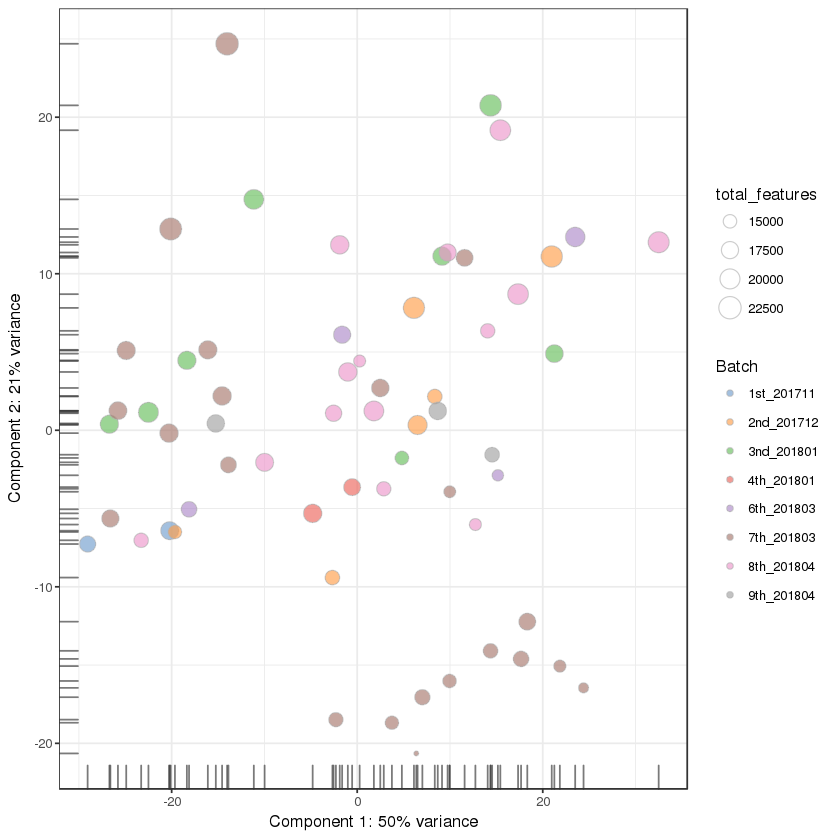

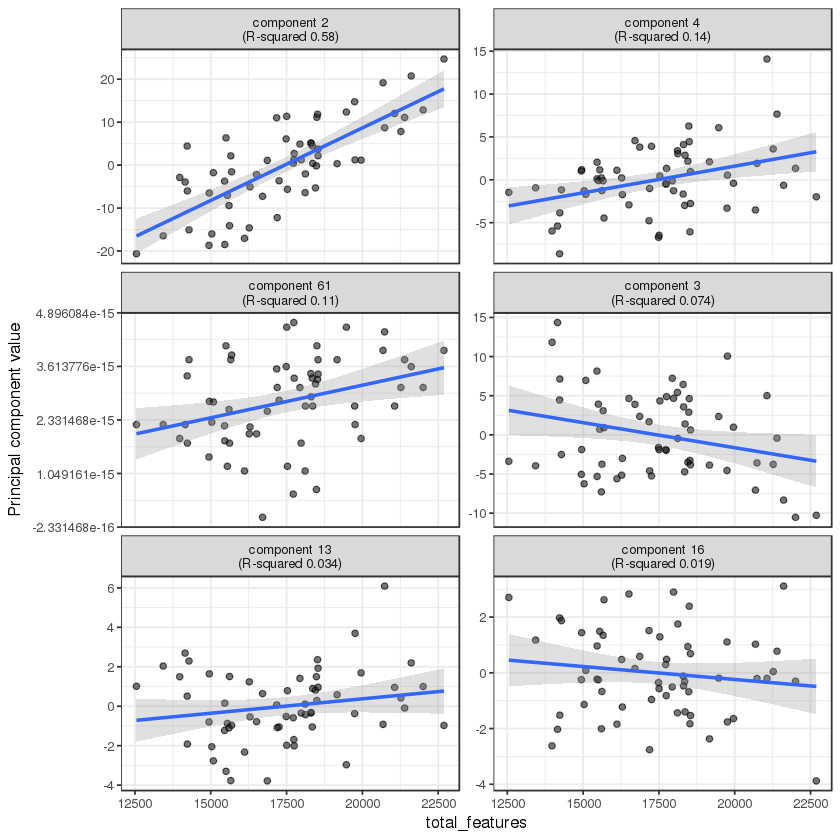

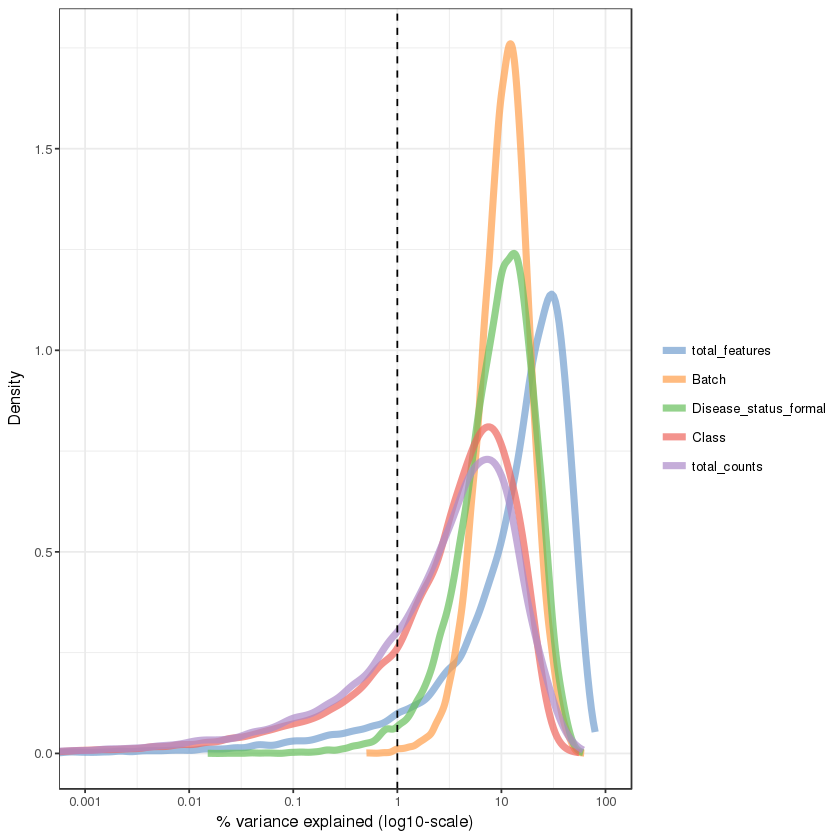

In [60]:
## check confounders
plotPCA(
    reads.qc.impute[endog_genes, ],
    exprs_values = "logcounts_raw",
    colour_by = "Batch",
    size_by = "total_features"
)
plotQC(
    reads.qc.impute[endog_genes, ],
    type = "find-pcs",
    exprs_values = "logcounts_raw",
    variable = "total_features"
)

plotQC(
    reads.qc.impute[endog_genes, ],
    type = "expl",
    exprs_values = "logcounts_raw",
    variables = c(
        "total_features",
        "total_counts",
        "Batch",
        "Disease_status_formal",
        "Class"
    )
)

In [62]:
library(EDASeq)
library(RUVSeq)
library(sva)
library(scRNA.seq.funcs)

In [110]:
scIdx <- matrix(-1, ncol = max(table(wholeanno$Status)), nrow = 5)
tmp <- which(wholeanno$Status[wholeanno$sampleuse ==1] == "A")
scIdx[1, 1:length(tmp)] <- tmp
tmp <- which(wholeanno$Status[wholeanno$sampleuse ==1] == "B")
scIdx[2, 1:length(tmp)] <- tmp
tmp <- which(wholeanno$Status[wholeanno$sampleuse ==1] == "C")
scIdx[3, 1:length(tmp)] <- tmp
tmp <- which(wholeanno$Status[wholeanno$sampleuse ==1] == "HD")
scIdx[4, 1:length(tmp)] <- tmp
tmp <- which(wholeanno$Status[wholeanno$sampleuse ==1]== "CHB")
scIdx[5, 1:length(tmp)] <- tmp
cIdx <- rownames(reads.qc.impute)

In [85]:
scIdx

1,2,4,8,9,11,13,14,16,17,⋯,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
5,6,7,10,12,15,19,21,24,27,⋯,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
3,18,22,28,-1,-1,-1,-1,-1,-1,⋯,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
31,32,33,34,35,36,37,38,39,40,⋯,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
59,60,61,-1,-1,-1,-1,-1,-1,-1,⋯,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1


In [111]:
ruvs <- RUVs(logcounts(reads.qc.impute), cIdx, k = 1, scIdx = scIdx, isLog = TRUE)
assay(reads.qc.impute, "ruvs1") <- ruvs$normalizedCounts
ruvs <- RUVs(logcounts(reads.qc.impute), cIdx, k = 5, scIdx = scIdx, isLog = TRUE)
assay(reads.qc.impute, "ruvs5") <- ruvs$normalizedCounts
ruvs <- RUVs(logcounts(reads.qc.impute), cIdx, k = 10, scIdx = scIdx, isLog = TRUE)
assay(reads.qc.impute, "ruvs10") <- ruvs$normalizedCounts
ruvs <- RUVs(logcounts(reads.qc.impute), cIdx, k = 20, scIdx = scIdx, isLog = TRUE)
assay(reads.qc.impute, "ruvs20") <- ruvs$normalizedCounts

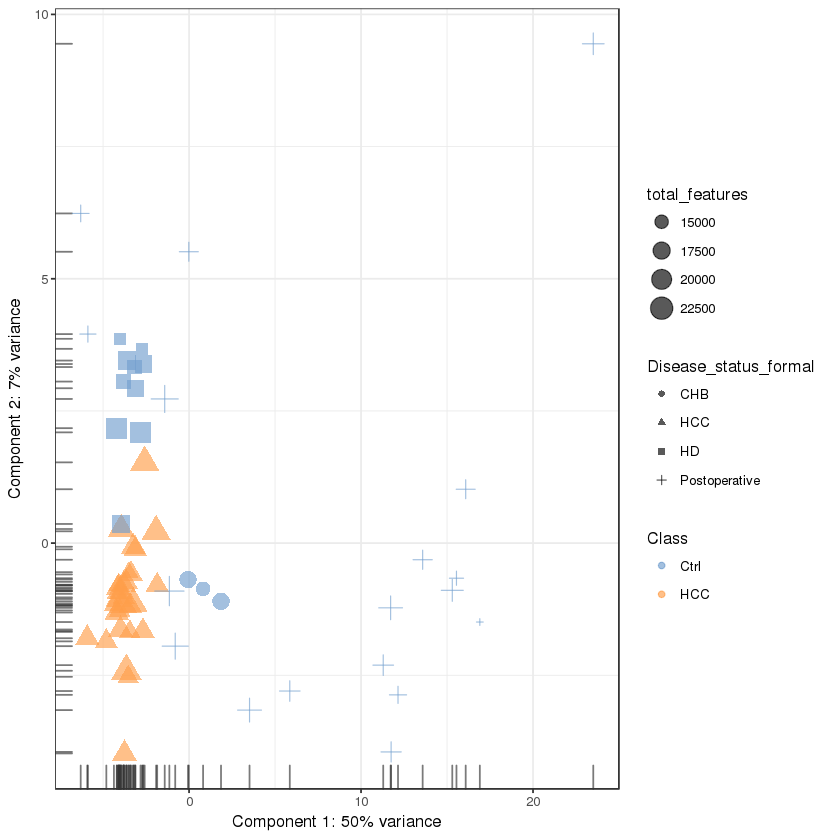

In [112]:
plotPCA(
    reads.qc.impute,
    exprs_values = "ruvs20",
    colour_by = "Class",
    shape_by = "Disease_status_formal",
    size_by = "total_features",
    ntop=100
)

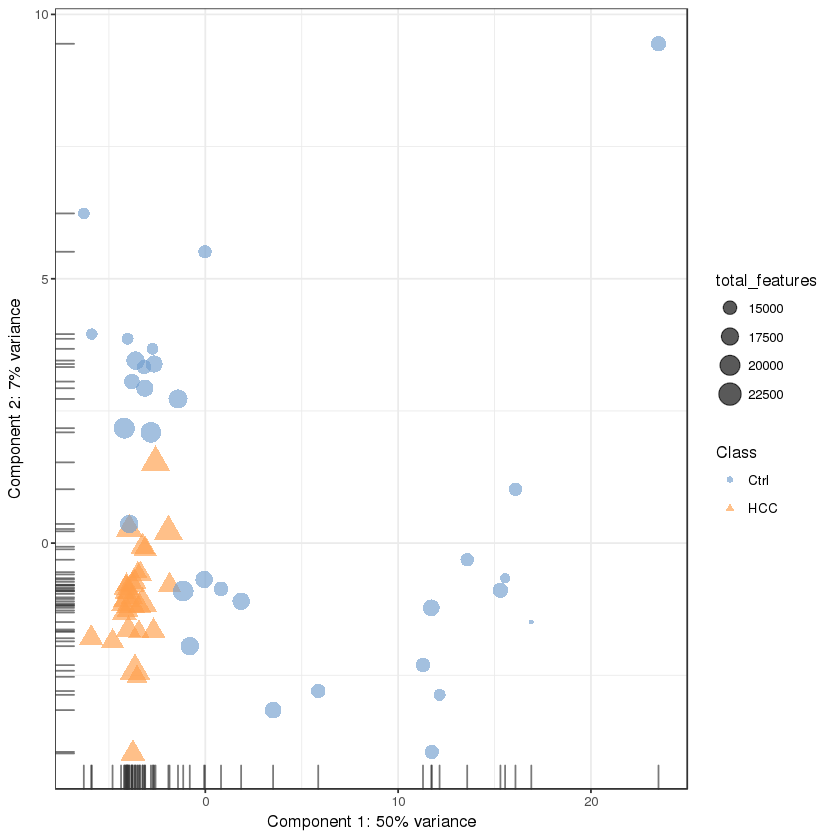

In [113]:
plotPCA(
    reads.qc.impute,
    exprs_values = "ruvs20",
    colour_by = "Class",
    shape_by = "Class",
    size_by = "total_features",
    ntop=100
)

In [114]:
scIdx <- matrix(-1, ncol = max(table(reads.qc.impute$Class)), nrow = 2)
tmp <- which(wholeanno$Class[wholeanno$sampleuse ==1] == "HCC")
scIdx[1, 1:length(tmp)] <- tmp
tmp <- which(wholeanno$Class[wholeanno$sampleuse ==1] == "Ctrl")
scIdx[2, 1:length(tmp)] <- tmp

cIdx <- rownames(reads.qc.impute)
ruvs <- RUVs(logcounts(reads.qc.impute), cIdx, k = 1, scIdx = scIdx, isLog = TRUE)
assay(reads.qc.impute, "ruvs1") <- ruvs$normalizedCounts
ruvs <- RUVs(logcounts(reads.qc.impute), cIdx, k = 5, scIdx = scIdx, isLog = TRUE)
assay(reads.qc.impute, "ruvs5") <- ruvs$normalizedCounts
ruvs <- RUVs(logcounts(reads.qc.impute), cIdx, k = 10, scIdx = scIdx, isLog = TRUE)
assay(reads.qc.impute, "ruvs10") <- ruvs$normalizedCounts
ruvs <- RUVs(logcounts(reads.qc.impute), cIdx, k = 20, scIdx = scIdx, isLog = TRUE)
assay(reads.qc.impute, "ruvs20") <- ruvs$normalizedCounts

In [115]:
wholeanno$Class[wholeanno$sampleuse ==1]

[1] "HCC"  "HCC"  "HCC"  "HCC"  "HCC"  "HCC"  "HCC"  "HCC"  "HCC"  "HCC" 
[11] "HCC"  "HCC"  "HCC"  "HCC"  "HCC"  "HCC"  "HCC"  "HCC"  "HCC"  "HCC" 
[21] "HCC"  "HCC"  "HCC"  "HCC"  "HCC"  "HCC"  "HCC"  "HCC"  "HCC"  "HCC" 
[31] "Ctrl" "Ctrl" "Ctrl" "Ctrl" "Ctrl" "Ctrl" "Ctrl" "Ctrl" "Ctrl" "Ctrl"
[41] "Ctrl" "Ctrl" "Ctrl" "Ctrl" "Ctrl" "Ctrl" "Ctrl" "Ctrl" "Ctrl" "Ctrl"
[51] "Ctrl" "Ctrl" "Ctrl" "Ctrl" "Ctrl" "Ctrl" "Ctrl" "Ctrl" "Ctrl" "Ctrl"
[61] "Ctrl"

In [106]:
scIdx

1,2,3,4,5,6,7,8,9,10,⋯,22,23,24,25,26,27,28,29,30,-1
31,32,33,34,35,36,37,38,39,40,⋯,52,53,54,55,56,57,58,59,60,61


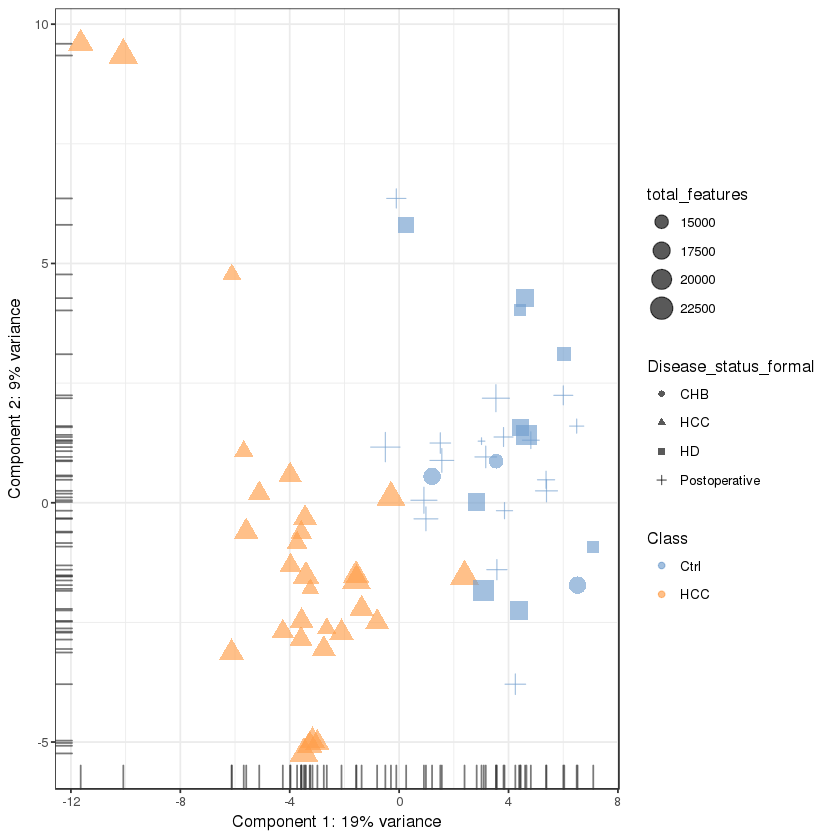

In [104]:
plotPCA(
    reads.qc.impute,
    exprs_values = "ruvs20",
    colour_by = "Class",
    shape_by = "Disease_status_formal",
    size_by = "total_features",
    ntop=100
)

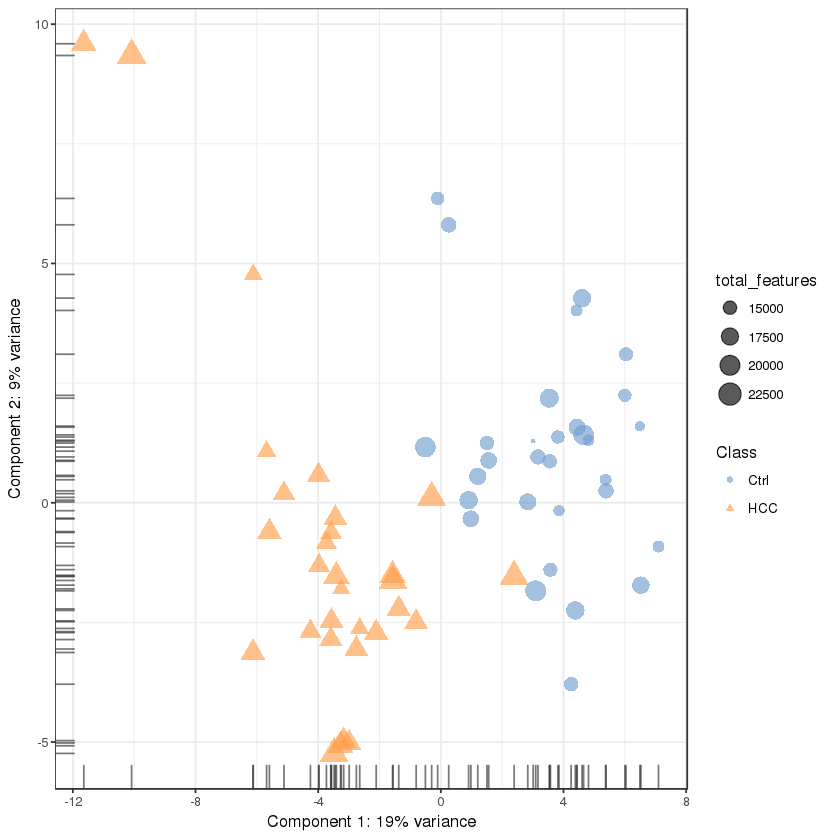

In [105]:
plotPCA(
    reads.qc.impute,
    exprs_values = "ruvs20",
    colour_by = "Class",
    shape_by = "Class",
    size_by = "total_features",
    ntop=100
)

#### test random

In [107]:
scIdx

1,2,3,4,5,6,7,8,9,10,⋯,22,23,24,25,26,27,28,29,30,-1
31,32,33,34,35,36,37,38,39,40,⋯,52,53,54,55,56,57,58,59,60,61


In [117]:
V<-seq(1:61)
set.seed(001) # just to make it reproducible
V<-sample(V)

In [120]:
scIdx <- matrix(-1, ncol = max(table(reads.qc.impute$Class)), nrow = 2)

scIdx[1, 1:30] <- V[1:30]
scIdx[2, 1:31] <- V[31:61]

cIdx <- rownames(reads.qc.impute)
ruvs <- RUVs(logcounts(reads.qc.impute), cIdx, k = 1, scIdx = scIdx, isLog = TRUE)
assay(reads.qc.impute, "ruvs1") <- ruvs$normalizedCounts
ruvs <- RUVs(logcounts(reads.qc.impute), cIdx, k = 5, scIdx = scIdx, isLog = TRUE)
assay(reads.qc.impute, "ruvs5") <- ruvs$normalizedCounts
ruvs <- RUVs(logcounts(reads.qc.impute), cIdx, k = 10, scIdx = scIdx, isLog = TRUE)
assay(reads.qc.impute, "ruvs10") <- ruvs$normalizedCounts
ruvs <- RUVs(logcounts(reads.qc.impute), cIdx, k = 20, scIdx = scIdx, isLog = TRUE)
assay(reads.qc.impute, "ruvs20") <- ruvs$normalizedCounts

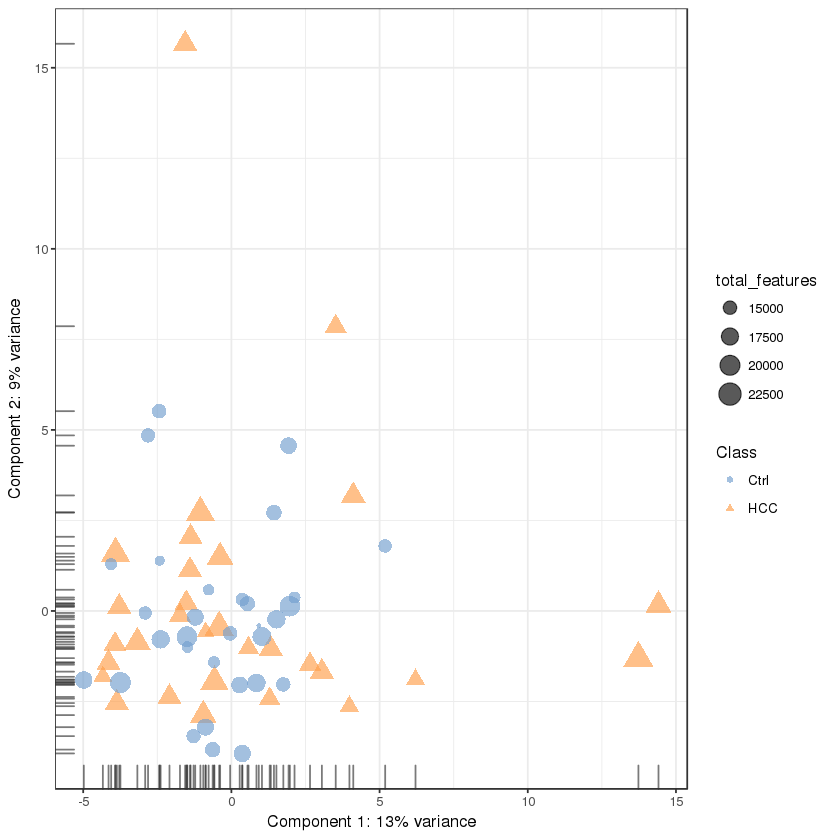

In [121]:
plotPCA(
    reads.qc.impute,
    exprs_values = "ruvs20",
    colour_by = "Class",
    shape_by = "Class",
    size_by = "total_features",
    ntop=100
)